# mljar-supervised: Data Analysis

### Resources:

- [visualize decision tree](https://mljar.com/blog/visualize-decision-tree/)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

## Data

In [2]:
## load data
data = datasets.load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df.target = df.target.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
# data preparation
X = df[df.columns[:3]]
y = df[[df.columns[4]]]

## Extended EDA

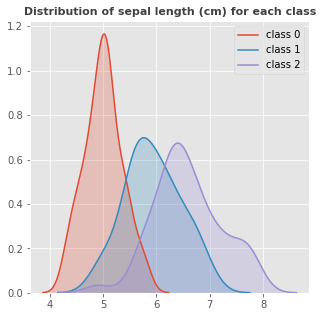

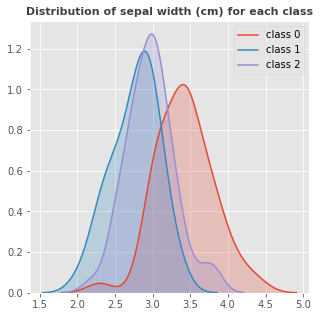

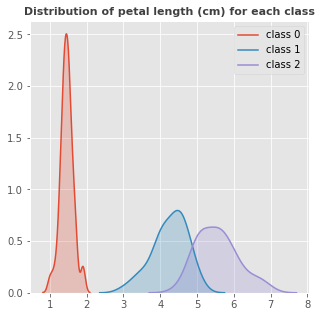

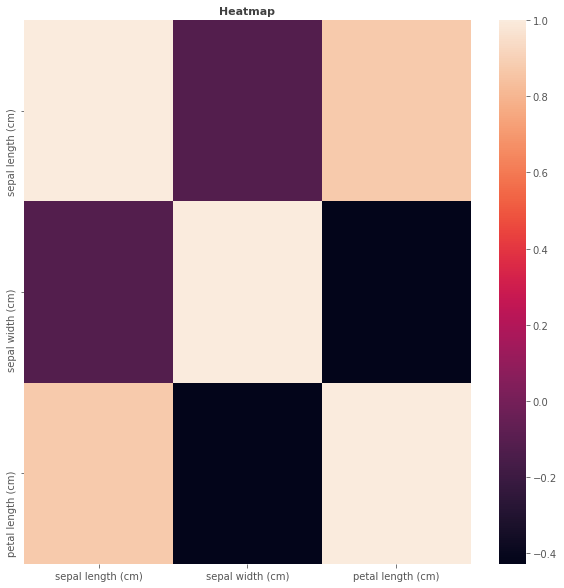

In [4]:
from supervised.preprocessing.eda import EDA
EDA.extensive_eda(X,y.target,save_path="Extended_EDA/")

## AutoML with "Explain" mode

In [5]:
from supervised.automl import AutoML
automl = AutoML(mode="Explain", explain_level=2)
automl.fit(X, y.target)

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.099159 trained in 0.16 seconds
2_DecisionTree logloss 0.452221 trained in 6.24 seconds
3_Linear logloss 0.243391 trained in 5.03 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.145484 trained in 4.64 seconds
5_Default_NeuralNetwork logloss 0.29232 trained in 1.95 seconds
6_Default_RandomForest logloss 0.172105 trained in 4.16 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.127714 trained in 0.12 seconds
AutoML fit time: 24.75 seconds


AutoML(explain_level=2)

In [6]:
help(AutoML)

Help on class AutoML in module supervised.automl:

class AutoML(supervised.base_automl.BaseAutoML)
 |  AutoML(results_path=None, total_time_limit=3600, mode='Explain', ml_task='auto', model_time_limit=None, algorithms='auto', train_ensemble=True, stack_models='auto', eval_metric='auto', validation_strategy='auto', explain_level='auto', golden_features='auto', features_selection='auto', start_random_models='auto', hill_climbing_steps='auto', top_models_to_improve='auto', boost_on_errors='auto', kmeans_features='auto', verbose=1, random_state=1234)
 |  
 |  Automated Machine Learning for supervised tasks (binary classification, multiclass classification, regression).
 |  
 |  Method resolution order:
 |      AutoML
 |      supervised.base_automl.BaseAutoML
 |      sklearn.base.BaseEstimator
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, results_path=None, total_time_limit=3600, mode='Explain', ml_task='auto', model_time_limit=None, algorith